In [1]:
import copy
import json
import numbers
import os
import os.path as osp
from json import JSONDecodeError

import numpy as np
import pandas as pd
import scipy
import scipy.interpolate

In [2]:
def _flatten_dict(dt, delimiter="/"):
    dt = copy.deepcopy(dt)
    while any(isinstance(v, dict) for v in dt.values()):
        remove = []
        add = {}
        for key, value in dt.items():
            if isinstance(value, dict):
                for subkey, v in value.items():
                    add[delimiter.join([key, subkey])] = v
                remove.append(key)
        dt.update(add)
        for k in remove:
            del dt[k]
    return dt

def _parse(p):
    dataframe = []
    fn = p.split("/")[-1]
    with open(osp.join(p, "result.json"), "r") as f:
        for l in f:
            data = json.loads(l)
            data = _flatten_dict(data)
            data["file_name"] = fn
            dataframe.append(data)
    dataframe = pd.DataFrame(dataframe)
    dataframe = dataframe.drop(columns=["config/multiagent/policies/default"])
    # print(len(dataframe), list(dataframe.keys()), dataframe["config/multiagent/policies/default"])
    return dataframe


def parse(root):
    """
    Read and form data into a dataframe
    """
    df = []
    paths = [osp.join(root, p) for p in os.listdir(root) if osp.isdir(osp.join(root, p))]
    for pi, p in enumerate(paths):
        print(f"Finish {pi + 1}/{len(paths)} trials.")
        try:
            ret = _parse(p)
        except (FileNotFoundError, JSONDecodeError):
            print("Path {} not found. Continue.".format(p))
            continue
        if ret is not None:
            df.append(ret)
    if not df:
        print("No Data Found!")
        return None
    df = pd.concat(df)
    return df

def smooth(data, num_points=200, interpolate_x="timesteps_total", interpolate_y=None, y_span=1, splitter="file_name"):
    data = data.copy()
    if num_points <= 0:
        return data
    trial_list = [j for i, j in data.groupby(splitter)]
    num_points_ = int(max(len(df) for df in trial_list))
    print("Found {} points, draw {} points.".format(num_points_, num_points))
    num_points = min(num_points, num_points_)
    range_min = min(df[interpolate_x].min() for df in trial_list)
    range_max = max(df[interpolate_x].max() for df in trial_list)
    interpolate_range = np.linspace(range_min, range_max, num_points)
    keys = data.keys()
    new_trial_list = []
    for df in trial_list:
        mask = np.logical_and(df[interpolate_x].min() < interpolate_range, interpolate_range < df[interpolate_x].max())
        mask_rang = interpolate_range[mask]
        if len(df) > 1:
            new_df = {}
            df = df.reset_index(drop=True)
            for k in keys:
                if isinstance(df[k][0], numbers.Number):
                    try:
                        new_df[k] = scipy.interpolate.interp1d(df[interpolate_x], df[k])(mask_rang)
                    except ValueError:
                        continue
                elif isinstance(df[k][0], list):
                    continue
                else:
                    new_df[k] = df[k].unique()[0]
            new_trial_list.append(pd.DataFrame(new_df))
        else:
            new_trial_list.append(df)
    return pd.concat(new_trial_list, ignore_index=True)


In [3]:
def get_useless_keys(ret):
    useless_keys = [
        k for k in ret.keys() 
        if (
            "config" in k and
            k != "config/env" and 
            k != "config/env_config/start_seed"
        ) or (
            "timers" in k
        ) or (
            "sampler_perf" in k
        ) or (
            "hist_stats" in k
        ) or (
            "_min_" in k
        ) or (
            "_max_" in k
        ) or (
            "_mean_max" in k
        ) or (
            "_mean_min" in k
        )
    ]
    return useless_keys

# Read raw data and prepare some intermediate CSV files

In [5]:
path = "training_results/ccppo_mf/"
name = "CCPPO (Mean Field)"
new_path = "ccppo_mf"

df = parse(path)
new_df = smooth(df)
new_df["algo"] = name
new_df.to_csv("{}.csv".format(new_path))
# del df
# del new_df
print("Finished ", name)

Finish 1/48 trials.
Finish 2/48 trials.
Finish 3/48 trials.
Finish 4/48 trials.
Finish 5/48 trials.
Finish 6/48 trials.
Finish 7/48 trials.
Finish 8/48 trials.
Finish 9/48 trials.
Finish 10/48 trials.
Finish 11/48 trials.
Finish 12/48 trials.
Finish 13/48 trials.
Finish 14/48 trials.
Finish 15/48 trials.
Finish 16/48 trials.
Finish 17/48 trials.
Finish 18/48 trials.
Finish 19/48 trials.
Finish 20/48 trials.
Finish 21/48 trials.
Finish 22/48 trials.
Finish 23/48 trials.
Finish 24/48 trials.
Finish 25/48 trials.
Finish 26/48 trials.
Finish 27/48 trials.
Finish 28/48 trials.
Finish 29/48 trials.
Finish 30/48 trials.
Finish 31/48 trials.
Finish 32/48 trials.
Finish 33/48 trials.
Finish 34/48 trials.
Finish 35/48 trials.
Finish 36/48 trials.
Finish 37/48 trials.
Finish 38/48 trials.
Finish 39/48 trials.
Finish 40/48 trials.
Finish 41/48 trials.
Finish 42/48 trials.
Finish 43/48 trials.
Finish 44/48 trials.
Finish 45/48 trials.
Finish 46/48 trials.
Finish 47/48 trials.
Finish 48/48 trials.
F

In [4]:
path = "training_results/ccppo_concat/"
name = "CCPPO (Concat)"
new_path = "ccppo_concat"

df = parse(path)
new_df = smooth(df)
new_df["algo"] = name
new_df.to_csv("{}.csv".format(new_path))
# del df
# del new_df
print("Finished ", name)

Finish 1/48 trials.
Finish 2/48 trials.
Finish 3/48 trials.
Finish 4/48 trials.
Finish 5/48 trials.
Finish 6/48 trials.
Finish 7/48 trials.
Finish 8/48 trials.
Finish 9/48 trials.
Finish 10/48 trials.
Finish 11/48 trials.
Finish 12/48 trials.
Finish 13/48 trials.
Finish 14/48 trials.
Finish 15/48 trials.
Finish 16/48 trials.
Finish 17/48 trials.
Finish 18/48 trials.
Finish 19/48 trials.
Finish 20/48 trials.
Finish 21/48 trials.
Finish 22/48 trials.
Finish 23/48 trials.
Finish 24/48 trials.
Finish 25/48 trials.
Finish 26/48 trials.
Path training_results/ccppo_concat/CCPPOTrainerForMAOurEnvironment_CCMultiAgentTollgateEnv_8533d_00040_40_counterfactual=True,env=CCMultiAgentTollgateEnv,start_seed=_2022-10-11_18-04-31 not found. Continue.
Finish 27/48 trials.
Finish 28/48 trials.
Finish 29/48 trials.
Finish 30/48 trials.
Finish 31/48 trials.
Finish 32/48 trials.
Finish 33/48 trials.
Finish 34/48 trials.
Finish 35/48 trials.
Finish 36/48 trials.
Finish 37/48 trials.
Finish 38/48 trials.
Fini

In [4]:
path = "training_results/ippo/"
name = "IPPO"
new_path = "ippo"

df = parse(path)
new_df = smooth(df)
new_df["algo"] = name
new_df.to_csv("{}.csv".format(new_path))
# del df
# del new_df
print("Finished ", name)

Finish 1/48 trials.
Finish 2/48 trials.
Finish 3/48 trials.
Finish 4/48 trials.
Finish 5/48 trials.
Finish 6/48 trials.
Finish 7/48 trials.
Finish 8/48 trials.
Finish 9/48 trials.
Path training_results/ippo/IPPO_MultiAgentBottleneckEnv_ad347_00003_3_env=MultiAgentBottleneckEnv,start_seed=5000,seed=0_2022-10-03_19-38-49 not found. Continue.
Finish 10/48 trials.
Finish 11/48 trials.
Finish 12/48 trials.
Finish 13/48 trials.
Finish 14/48 trials.
Finish 15/48 trials.
Finish 16/48 trials.
Finish 17/48 trials.
Finish 18/48 trials.
Finish 19/48 trials.
Finish 20/48 trials.
Finish 21/48 trials.
Finish 22/48 trials.
Finish 23/48 trials.
Path training_results/ippo/IPPO_MultiAgentBottleneckEnv_ad347_00015_15_env=MultiAgentBottleneckEnv,start_seed=7000,seed=0_2022-10-03_19-38-49 not found. Continue.
Finish 24/48 trials.
Finish 25/48 trials.
Finish 26/48 trials.
Finish 27/48 trials.
Path training_results/ippo/IPPO_MultiAgentBottleneckEnv_ad347_00009_9_env=MultiAgentBottleneckEnv,start_seed=6000,see

In [4]:
path = "training_results/cl/"
name = "CL"
new_path = "cl"

df = parse(path)
new_df = smooth(df)
new_df["algo"] = name
new_df.to_csv("{}.csv".format(new_path))
# del df
# del new_df
print("Finished ", name)

Finish 1/48 trials.
Finish 2/48 trials.
Finish 3/48 trials.
Path training_results/cl/IPPOCL_CLMultiAgentRoundaboutEnv_e2a67_00010_10_env=CLMultiAgentRoundaboutEnv,start_seed=6000,seed=0_2022-10-03_19-40-19 not found. Continue.
Finish 4/48 trials.
Finish 5/48 trials.
Finish 6/48 trials.
Finish 7/48 trials.
Finish 8/48 trials.
Finish 9/48 trials.
Finish 10/48 trials.
Finish 11/48 trials.
Finish 12/48 trials.
Finish 13/48 trials.
Finish 14/48 trials.
Finish 15/48 trials.
Path training_results/cl/IPPOCL_CLMultiAgentRoundaboutEnv_e2a67_00028_28_env=CLMultiAgentRoundaboutEnv,start_seed=9000,seed=0_2022-10-04_00-37-52 not found. Continue.
Finish 16/48 trials.
Finish 17/48 trials.
Finish 18/48 trials.
Finish 19/48 trials.
Finish 20/48 trials.
Finish 21/48 trials.
Finish 22/48 trials.
Finish 23/48 trials.
Finish 24/48 trials.
Finish 25/48 trials.
Path training_results/cl/IPPOCL_CLMultiAgentRoundaboutEnv_e2a67_00004_4_env=CLMultiAgentRoundaboutEnv,start_seed=5000,seed=0_2022-10-03_19-40-19 not f

In [4]:
path = "training_results/copo/"
name = "CoPO"
new_path = "copo"

df = parse(path)
new_df = smooth(df)
new_df["algo"] = name
new_df.to_csv("{}.csv".format(new_path))
# del df
# del new_df
print("Finished ", name)

Finish 1/48 trials.
Finish 2/48 trials.
Finish 3/48 trials.
Finish 4/48 trials.
Path training_results/copo/CoPO_CCMultiAgentRoundaboutEnv_647d3_00043_43_env=CCMultiAgentRoundaboutEnv,start_seed=12000,seed=0,use_centralized_critic=False,u_2022-10-05_15-58-49 not found. Continue.
Finish 5/48 trials.
Finish 6/48 trials.
Finish 7/48 trials.
Finish 8/48 trials.
Finish 9/48 trials.
Finish 10/48 trials.
Finish 11/48 trials.
Finish 12/48 trials.
Finish 13/48 trials.
Finish 14/48 trials.
Finish 15/48 trials.
Finish 16/48 trials.
Finish 17/48 trials.
Finish 18/48 trials.
Finish 19/48 trials.
Path training_results/copo/CoPO_CCMultiAgentTollgateEnv_647d3_00026_26_env=CCMultiAgentTollgateEnv,start_seed=9000,seed=0,use_centralized_critic=False,use_di_2022-10-04_19-30-21 not found. Continue.
Finish 20/48 trials.
Finish 21/48 trials.
Finish 22/48 trials.
Path training_results/copo/CoPO_CCMultiAgentRoundaboutEnv_647d3_00037_37_env=CCMultiAgentRoundaboutEnv,start_seed=11000,seed=0,use_centralized_critic

# Aggregate all results and process the environment names

### CL

In [4]:
cl_data = pd.read_csv("cl.csv")
cl_data["config/env"].unique()

array(['CLMultiAgentBottleneckEnv', 'CLMultiAgentIntersectionEnv',
       'CLMultiAgentMetaDrive', 'CLMultiAgentParkingLotEnv',
       'CLMultiAgentRoundaboutEnv', 'CLMultiAgentTollgateEnv'],
      dtype=object)

In [5]:
env_mapping = {
    "CLMultiAgentBottleneckEnv": "Bottleneck",
    "CLMultiAgentTollgateEnv": "Tollgate",
    "CLMultiAgentIntersectionEnv": "Intersection",
    "CLMultiAgentRoundaboutEnv": "Roundabout",
    "CLMultiAgentParkingLotEnv": "Parking Lot",
    "CLMultiAgentMetaDrive": "PG Map"
}

cl_data["env"] = ""
tmplist = []
for old_name, new_name in env_mapping.items():
    tmp = cl_data[cl_data["config/env"] == old_name].copy()
    tmp["env"] = new_name
    tmplist.append(tmp)
cl_data = pd.concat(tmplist)

useless_keys = get_useless_keys(cl_data)
print(cl_data.memory_usage().sum())
cl_data = cl_data.drop(columns=useless_keys)
print(cl_data.memory_usage().sum())

print("We finished processing CL data.")

18737730
6780510
We finished processing CL data.


In [6]:
cl_data.env.unique()

array(['Bottleneck', 'Tollgate', 'Intersection', 'Roundabout',
       'Parking Lot', 'PG Map'], dtype=object)

### IPPO

In [7]:
ippo_data = pd.concat([pd.read_csv(path) for path in ["ippo.csv"]])
ippo_data["config/env"].unique()

array(['MultiAgentBottleneckEnv', 'MultiAgentIntersectionEnv',
       'MultiAgentMetaDrive', 'MultiAgentParkingLotEnv',
       'MultiAgentRoundaboutEnv', 'MultiAgentTollgateEnv'], dtype=object)

In [8]:
env_mapping = {
    "MultiAgentBottleneckEnv": "Bottleneck",
    "MultiAgentTollgateEnv": "Tollgate",
    "MultiAgentIntersectionEnv": "Intersection",
    "MultiAgentRoundaboutEnv": "Roundabout",
    "MultiAgentParkingLotEnv": "Parking Lot",
    "MultiAgentMetaDrive": "PG Map"
}

ippo_data["env"] = ""
tmplist = []
for old_name, new_name in env_mapping.items():
    tmp = ippo_data[ippo_data["config/env"] == old_name].copy()
    tmp["env"] = new_name
    tmplist.append(tmp)
ippo_data = pd.concat(tmplist)

useless_keys = get_useless_keys(ippo_data)
print(ippo_data.memory_usage().sum())
ippo_data = ippo_data.drop(columns=useless_keys)
print(ippo_data.memory_usage().sum())

print("We finished processing IPPO data.")

18321336
6629832
We finished processing IPPO data.


In [9]:
ippo_data.env.unique()

array(['Bottleneck', 'Tollgate', 'Intersection', 'Roundabout',
       'Parking Lot', 'PG Map'], dtype=object)

### CCPPO and COPO

In [10]:
ccppo_data = pd.concat([pd.read_csv(path) for path in ["ccppo_mf.csv", "ccppo_concat.csv"]])
ccppo_data["config/env"].unique()

array(['CCMultiAgentBottleneckEnv', 'CCMultiAgentIntersectionEnv',
       'CCMultiAgentMetaDrive', 'CCMultiAgentParkingLotEnv',
       'CCMultiAgentRoundaboutEnv', 'CCMultiAgentTollgateEnv'],
      dtype=object)

In [11]:
env_mapping = {
    "CCMultiAgentBottleneckEnv": "Bottleneck",
    "CCMultiAgentTollgateEnv": "Tollgate",
    "CCMultiAgentIntersectionEnv": "Intersection",
    "CCMultiAgentRoundaboutEnv": "Roundabout",
    "CCMultiAgentParkingLotEnv": "Parking Lot",
    "CCMultiAgentMetaDrive": "PG Map"
}

ccppo_data["env"] = ""
tmplist = []
for old_name, new_name in env_mapping.items():
    tmp = ccppo_data[ccppo_data["config/env"] == old_name].copy()
    tmp["env"] = new_name
    tmplist.append(tmp)
ccppo_data = pd.concat(tmplist)

useless_keys = get_useless_keys(ccppo_data)
print(ccppo_data.memory_usage().sum())
ccppo_data = ccppo_data.drop(columns=useless_keys)
print(ccppo_data.memory_usage().sum())

print("We finished processing CCPPO data.")

40658220
15295500
We finished processing CCPPO data.


In [12]:
copo_data = pd.concat([pd.read_csv(path) for path in ["copo.csv"]])
copo_data["config/env"].unique()

array(['CCMultiAgentBottleneckEnv', 'CCMultiAgentIntersectionEnv',
       'CCMultiAgentMetaDrive', 'CCMultiAgentParkingLotEnv',
       'CCMultiAgentRoundaboutEnv', 'CCMultiAgentTollgateEnv'],
      dtype=object)

In [13]:
env_mapping = {
    "CCMultiAgentBottleneckEnv": "Bottleneck",
    "CCMultiAgentTollgateEnv": "Tollgate",
    "CCMultiAgentIntersectionEnv": "Intersection",
    "CCMultiAgentRoundaboutEnv": "Roundabout",
    "CCMultiAgentParkingLotEnv": "Parking Lot",
    "CCMultiAgentMetaDrive": "PG Map"
}

copo_data["env"] = ""
tmplist = []
for old_name, new_name in env_mapping.items():
    tmp = copo_data[copo_data["config/env"] == old_name].copy()
    tmp["env"] = new_name
    tmplist.append(tmp)
copo_data = pd.concat(tmplist)

useless_keys = get_useless_keys(copo_data)
print(copo_data.memory_usage().sum())
copo_data = copo_data.drop(columns=useless_keys)
print(copo_data.memory_usage().sum())

print("We finished processing CoPO data.")

20186694
8181954
We finished processing CoPO data.


### Aggregate all data

In [14]:
aggregated_data = pd.concat([ippo_data, ccppo_data, cl_data, copo_data]).reset_index()

In [15]:
aggregated_data.env.unique()

array(['Bottleneck', 'Tollgate', 'Intersection', 'Roundabout',
       'Parking Lot', 'PG Map'], dtype=object)

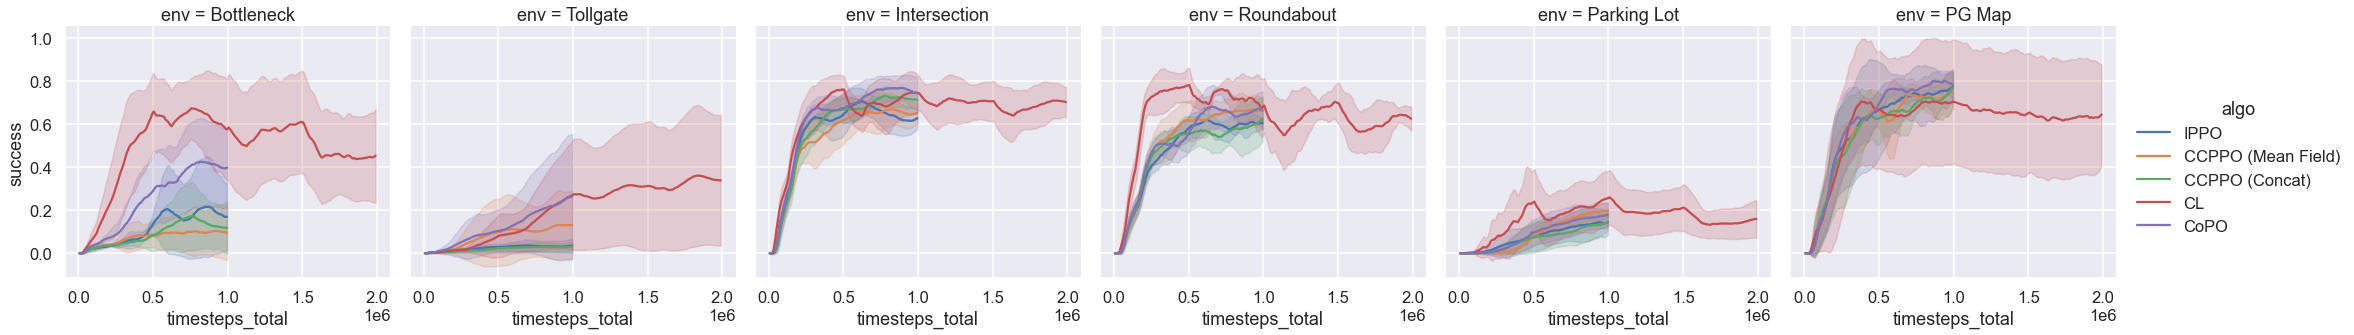

In [16]:
# Draw a little figure to see if data is processed properly.
import seaborn as sns
sns.set("talk", "darkgrid")
ax = sns.relplot(
    x="timesteps_total",
    y="success", 
    hue='algo',
    data=aggregated_data.copy(),
    ci="sd",
    kind="line",
    col="env",
)

In [17]:
aggregated_data.to_csv("training_results.csv")